<a href="https://colab.research.google.com/github/DanielSFreitas/Estudo.Pandas/blob/main/DataGame_Insights_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Bibliotecas para tratar dados
import pandas as pd
import numpy as np


#Bibliotecas para EDA
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

#Configurar para não exibir warnings
import warnings

warnings.filterwarnings("ignore")

#Configurar o estilo de gráfico do ggplot
plt.style.use("ggplot")

#Configurar para exibir até 15 linhas de um DataFrame do Pandas
pd.set_option("display.max_rows",15)

#Configurar para exibir todas as colunas d um DataFrame do Pandas
pd.set_option("display.max_columns", None)



In [2]:
game = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/vgchartz-2024.csv")
game.head()

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14


In [3]:
print(f"O dataframe possui {game.shape[0]} linhas e {game.shape[1] } colunas.")

O dataframe possui 64016 linhas e 14 colunas.


In [4]:
numerics = ["int16", "int32", "int64", "float16", "float32", "float64"]

numericas = game.select_dtypes(include=numerics)
nao_numericas=game.select_dtypes(exclude=numerics)

print(
    f"Temos {numericas.shape[1]} colunas númericas e {nao_numericas.shape[1]} colunas não-numéricas"
)

Temos 6 colunas númericas e 8 colunas não-numéricas


#Explorando os Dados

 Primeiro, vamos olhar as distribuições do total de vendas, uma das variáveis que mais chamam a atenção nos dados, tornando se necessário o uso da função dropna() para valores ausentes


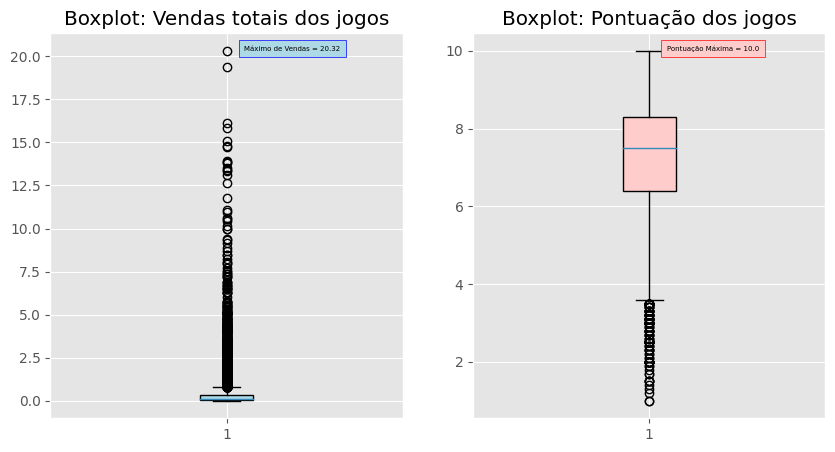

In [5]:
fig, axs = plt.subplots(1,2, figsize=(10,5)) #Cria uma figura com 2 subplots

#Cria um boxplot para a variável 'total_sales' no primeiro subplot
bp1 = axs[0].boxplot(game['total_sales'].dropna(), patch_artist=True)
axs[0].set_title('Boxplot: Vendas totais dos jogos')

#Define a cor do boxplot
bp1['boxes'][0].set_facecolor('lightblue')

#Adiciona a legenda do valor máximo
max_total = np.max(game['total_sales'])
axs[0].annotate(f'Máximo de Vendas = {max_total}',
                xy = (1, max_total),
                xytext = (1.05, max_total),
                bbox = dict(facecolor = 'lightblue', edgecolor = 'blue'),
                fontsize=5) #Modifica a fonte para um tamanho menor

#Cria um boxplot para a variável 'critic_score' no segundo layout
bp2=axs[1].boxplot(game['critic_score'].dropna(), patch_artist=True)
axs[1].set_title('Boxplot: Pontuação dos jogos')

#Define a cor do boxplot
bp2['boxes'][0].set_facecolor((1, 0.8, 0.8, 1))

#Adiciona a legenda do valor máximo
max_score = np.max(game['critic_score'])
axs[1].annotate(f'Pontuação Máxima = {max_score}',
                xy=(1, max_score),
                xytext=(1.05, max_score),
                bbox = dict(facecolor=(1, 0.8, 0.8, 1), edgecolor='red'),
                fontsize= 5) #Modifica a fonte para um tamanho menor

#Mostra os gáficos
plt.show()

Vamos verificar as estátiscas descritivas da sua pontuação e total de vendas

In [6]:
game[["critic_score", "total_sales"]].describe().T

,count,mean,std,min,25%,50%,75%,max
critic_score,6678.0,7.220440,1.457066,1.0,6.40,7.50,8.30,10.00
total_sales,18922.0,0.349113,0.807462,0.0,0.03,0.12,0.34,20.32


In [9]:
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2)

fig.add_trace(
    go.Bar(x=game['genre'].value_counts().index,
           y=game['genre'].value_counts().values,
           name='Gêneros'),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=game['console'].value_counts().index,
           y=game['console'].value_counts().values,
           name='Console'),
    row=1, col=2
)

fig.update_layout(title="Distribuição de Consoles e Genêros")
fig.show()

In [10]:
score_jogos = game.groupby('title')['console', 'critic_score'].sum().reset_index()
score_jogos = score_jogos.query('critic_score>50')

score_jogos.columns = ["Jogos", "Maiores Scores"]

fig = px.bar(score_jogos,
             y='Jogos',
             x='Maiores Scores',
             orientation='h',
             title='Jogos com Maiores scores',
             labels = {'Jogos': 'Jogos', 'Maiores Scores':'Maiores Scores'},
             color='Maiores Scores')

fig.update_yaxes(autorange='reversed')
fig.show()

In [11]:
marca_jogos = game.groupby(['title','publisher'])['console', 'critic_score'].sum().reset_index()
marca_jogos = marca_jogos.query('critic_score>50')
marca_jogos = marca_jogos.sort_values("critic_score", ascending=False)
marca_jogos


,title,publisher,critic_score
21467,Madden NFL 07,EA Sports,80.5
5850,Call of Duty: Black Ops,Activision,66.3
29689,Ratatouille,THQ,61.5
20208,LEGO Star Wars II: The Original Trilogy,LucasArts,60.9
20166,LEGO Batman: The Videogame,Warner Bros. Interactive,60.6
22188,Marvel: Ultimate Alliance,Activision,58.4
26368,Open Season,Ubisoft,58.0
12302,FIFA 07 Soccer,EA Sports,55.8
39243,Tiger Woods PGA Tour 07,EA Sports,54.5
39726,Tony Hawk's Pro Skater 2,Activision,53.4


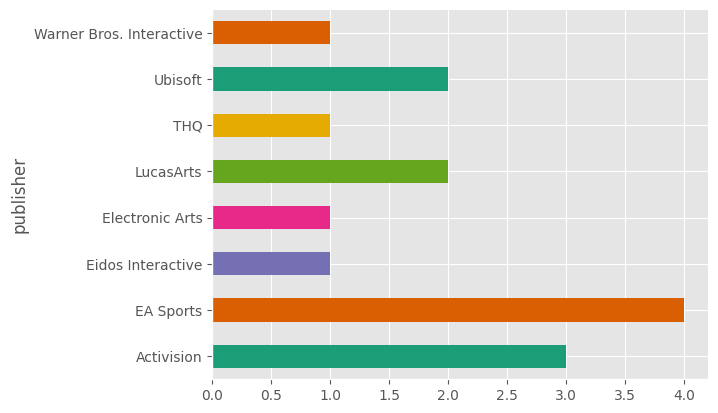

In [41]:
marca_jogos.groupby('publisher').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Assim podemos verificar que EA Sports é a dona do jogo com maior pontuação no mercado

In [12]:
marcas_atualizacoes = game.groupby('publisher')['last_update'].count().reset_index()
marcas_atualizacoes = marcas_atualizacoes[~marcas_atualizacoes["publisher"].str.lower().str.contains("unknown")]
top_marcas = marcas_atualizacoes.sort_values("last_update", ascending=False)[:10]
top_marcas.columns = ["Marca", "Ultima Atualização"]

fig = px.bar(top_marcas,
             y='Marca',
             x='Ultima Atualização',
             orientation = 'h',
             title='Top 10 marcas que mais atualizam seus jogos',
             labels = {'Ultima Atualização':'Ultima Atualização', 'Marca':'Marca'},
             color = 'Ultima Atualização')


fig.update_yaxes(autorange='reversed')
fig.show()

In [13]:
score_marca = game.groupby('publisher')['critic_score'].sum().reset_index()
score_marca = score_marca.sort_values("critic_score", ascending=False)[:10]

vendas_marca = game.groupby('publisher')['total_sales'].sum().reset_index()
vendas_marca = vendas_marca.sort_values("total_sales", ascending=False)[:10]

fig = go.Figure()

fig.add_trace(go.Bar(
    x=score_marca["publisher"],
    y=score_marca["critic_score"],
    name="Top Pontuação"
))

fig.add_trace(go.Bar(
    x=vendas_marca["publisher"],
    y=vendas_marca["total_sales"],
    name="Top vendas"
))

fig.update_layout(
    title="Maior Pontuação X Maiores Vendas",
    xaxis_title="Marca",
    yaxis_title="Valores"
)

fig.show()



Diante disso, pode ser verificado que apesar da Nintendo possuir a maior avaliação, o seu número de vendas é menor que o das outras empresas. Nos levando a pensar, será que a região na qual as vendas se concentram influenciam tanto em seu valor ?

In [14]:
# Agrupar por editora (publisher) e somar as vendas por região
vendas_por_regiao = game.groupby('publisher')[['na_sales', 'jp_sales', 'pal_sales', 'other_sales']].sum().reset_index()

# Encontrar a região com maior venda para cada editora
vendas_por_regiao['regiao_mais_vendida'] = vendas_por_regiao[['na_sales', 'jp_sales', 'pal_sales', 'other_sales']].idxmax(axis=1)

# Juntar os dados de vendas totais por marca com a região mais vendida
vendas_marca_com_regiao = pd.merge(vendas_marca, vendas_por_regiao[['publisher', 'regiao_mais_vendida']], on='publisher')

vendas_marca_com_regiao

,publisher,total_sales,regiao_mais_vendida
0,Activision,722.77,na_sales
1,Electronic Arts,644.13,na_sales
2,EA Sports,485.66,na_sales
3,Ubisoft,462.57,na_sales
4,THQ,320.89,na_sales
5,Sony Computer Entertainment,311.08,na_sales
6,Rockstar Games,239.67,na_sales
7,Konami,210.70,jp_sales
8,Sega,206.38,na_sales
9,Nintendo,140.80,jp_sales


In [15]:
top_10_marcas = vendas_marca.sort_values("total_sales", ascending=False).head(10)['publisher']

vendas_top_10_marcas = game[game['publisher'].isin(top_10_marcas)]

vendas_por_regiao_top_10_marcas = vendas_top_10_marcas.groupby('publisher')[['na_sales', 'jp_sales', 'pal_sales', 'other_sales']].sum()


fig = go.Figure()

for regiao in ['na_sales', 'jp_sales', 'pal_sales', 'other_sales']:
    fig.add_trace(go.Bar(
        x=vendas_por_regiao_top_10_marcas.index,
        y=vendas_por_regiao_top_10_marcas[regiao],
        name=regiao
    ))

fig.update_layout(
    barmode='group',
    title='Vendas por Região das 10 Marcas Principais',
    xaxis_title='Marcas',
    yaxis_title='Vendas',
    legend_title='Região'
)

fig.show()

 Dessa forma, pode se considerar  que as marcas que posicionam melhor seus produtos para a America e Europa possuem maior número de vendas.

In [47]:
genero_vendas = game.groupby('genre')['total_sales'].sum().reset_index()
genero_vendas.columns = ["Gênero", "Total de vendas"]

fig = go.Figure()

fig.add_trace(go.Bar(
    x=genero_vendas["Gênero"],
    y=genero_vendas["Total de vendas"],
    name="Gêneros de jogos mais vendidos"
))

fig.update_layout(
    title="Gêneros de jogos mais vendidos",
    xaxis_title="Gênero",
    yaxis_title="Total de vendas"
)

fig.show()


Aqui podemos ver que o Gênero com maior indício de vendas é o de ação. Sendo também o gênero do segundo jogo com maior pontuação e da marca com maior número de vendas.